In [2]:
import cv2
import PIL
from PIL import Image
import pytesseract as pt
import os
import re

In [3]:
pt.pytesseract.tesseract_cmd= r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [116]:
def printfaces(im,faces):
    
    sheet = Image.new('RGB', (1200,1000))
    cx =0; cy=0
    raised =0 
    #width = 300
    mheight = 300
    for x,y,w,h in faces.tolist():
            if h>=mheight:
                mheight=h 
            croped = im.crop((x,y,x+w,y+h))
            #croped = croped.crop((0,0,w,h))
            
            sheet.paste(croped,(cx,cy))

            if (cx+w+300)>=1200:
                cx = 0
                cy+=mheight
                raised+=1
            else :
                cx+=w
    
    return sheet.crop((0,0,1200,mheight*(raised+1)))

In [114]:
def findface(imagelocation):
    
    gray = cv2.imread(imagelocation,cv2.IMREAD_GRAYSCALE)
    face_detect = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
    faces = face_detect.detectMultiScale(gray,1.4,3)
    
    return faces

Enter name to lookup: Christo
Results found in a-0.png


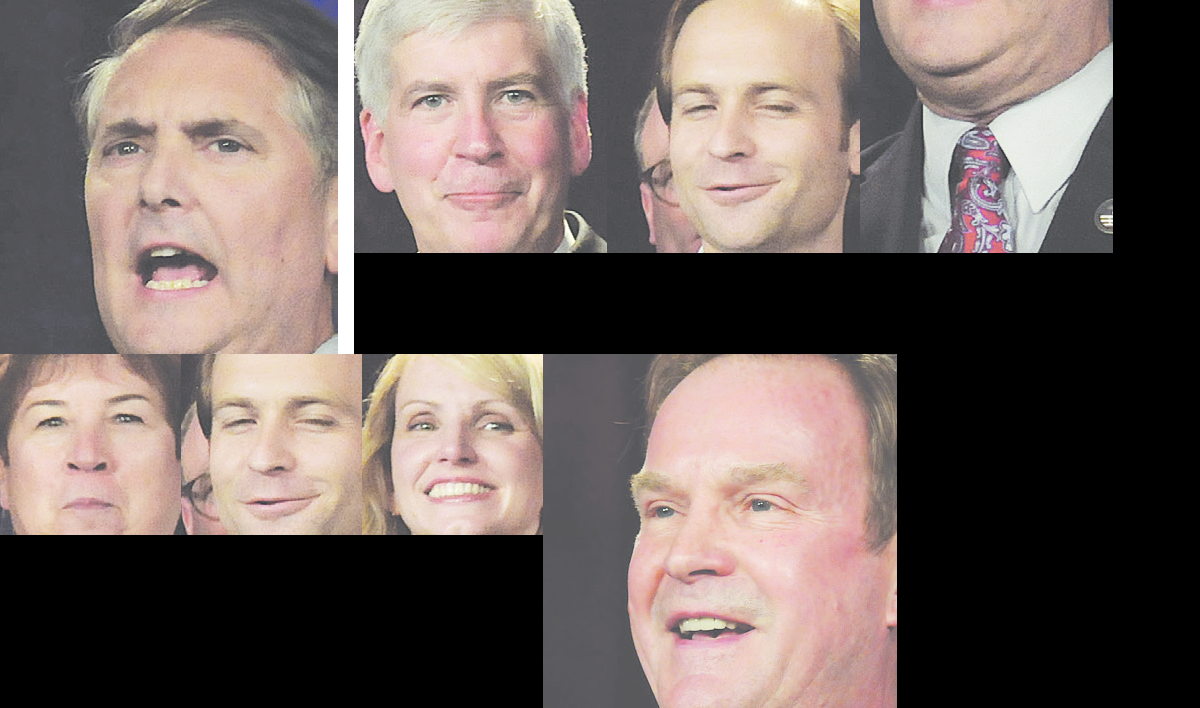

No results found in a-1.png
No results found in a-2.png
Results found in a-3.png


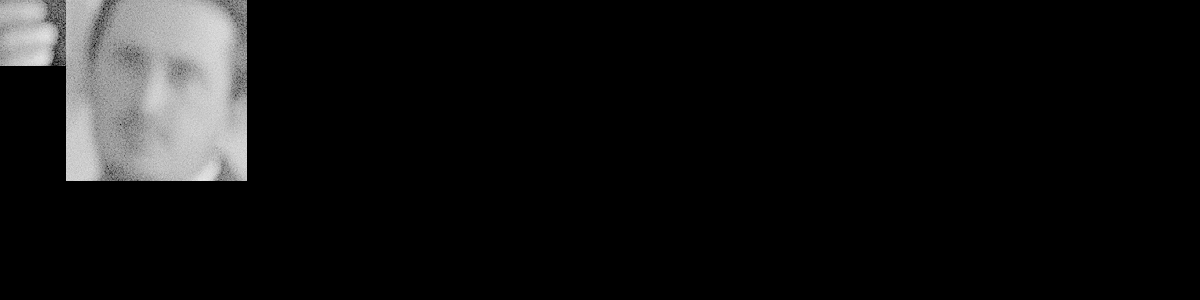

In [117]:
#os.chdir('C:\\Users\\user\\Downloads\\pictures')
pics = os.listdir()
pics =[pic for pic in pics if pic.endswith('.png')][:4]

lookup = str(input('Enter name to lookup: '))

for pic in pics:
    im = Image.open(pic)
    text = pt.image_to_string(im)
    match = re.search(lookup,text)
    if match!=None:
        faces=findface(pic)
        if len(faces.tolist())==0:
            print('Results found in {}'.format(pic))
            print('But there were no faces in that file!')
        else :
            print('Results found in {}'.format(pic))
            sheet =printfaces(im,faces)
            display(sheet)
    else :
        print('No results found in {}'.format(pic))
